<a href="https://colab.research.google.com/github/mha142/my_pytorch_tutorials/blob/main/02_pytorch_classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Extra resource: https://madewithml.com/

# 1. Data

# You can choose a toy dataset from here:
https://scikit-learn.org/stable/datasets/toy_dataset.html

In [1]:
import sklearn

from sklearn.datasets import make_circles

n_samples = 1000

X, y = make_circles(n_samples=n_samples, noise=0.03, random_state=42)

print(len(X))
print(len(y))
print("first 5 examples: ")
X[:5], y[:5]

1000
1000
first 5 examples: 


(array([[ 0.75424625,  0.23148074],
        [-0.75615888,  0.15325888],
        [-0.81539193,  0.17328203],
        [-0.39373073,  0.69288277],
        [ 0.44220765, -0.89672343]]),
 array([1, 1, 1, 1, 0]))

In [2]:
import pandas as pd

circles = pd.DataFrame({"Feature X1": X[:, 0], "Feature X2": X[:, 1], "Target_y_label": y})
circles.head(10)

,Feature X1,Feature X2,Target_y_label
0,0.754246,0.231481,1
1,-0.756159,0.153259,1
2,-0.815392,0.173282,1
3,-0.393731,0.692883,1
4,0.442208,-0.896723,0
5,-0.479646,0.676435,1
6,-0.013648,0.803349,1
7,0.771513,0.147760,1
8,-0.169322,-0.793456,1
9,-0.121486,1.021509,0


In [3]:
print(circles.columns)

Index(['Feature X1', 'Feature X2', 'Target_y_label'], dtype='object')


In [4]:
circles.Target_y_label.value_counts()

,count
Target_y_label,
1,500
0,500


In [5]:
#find how much data in each class
circles['Feature X1'].value_counts()


,count
Feature X1,
0.281057,1
0.754246,1
-0.756159,1
-0.815392,1
-0.393731,1
...,...
-0.117736,1
0.569467,1
-0.642490,1


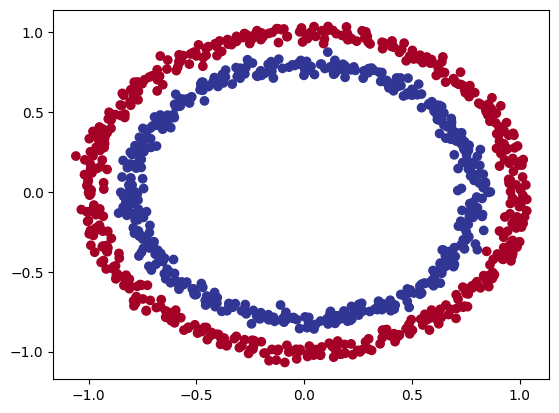

In [6]:
import matplotlib.pyplot as plt

plt.scatter(x=X[:, 0], y=X[:, 1], c=y, cmap=plt.cm.RdYlBu)
plt.show()

In [7]:
X.shape, y.shape # x has 2 features and y is just s ingle number (a scalar) that represents a label, 1000 is the number of samples

((1000, 2), (1000,))

In [8]:
X_sample = X[0]
y_sample = y[0]
X_sample, y_sample

(array([0.75424625, 0.23148074]), np.int64(1))

In [9]:
import torch
torch.__version__

'2.6.0+cu124'

In [10]:
#Convert data to tensors
X = torch.from_numpy(X).type(torch.float)
y = torch.from_numpy(y).type(torch.float)
X[:5], y[:5]

(tensor([[ 0.7542,  0.2315],
         [-0.7562,  0.1533],
         [-0.8154,  0.1733],
         [-0.3937,  0.6929],
         [ 0.4422, -0.8967]]),
 tensor([1., 1., 1., 1., 0.]))

In [11]:
type(X), X.dtype, type(y), y.dtype

(torch.Tensor, torch.float32, torch.Tensor, torch.float32)

In [12]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42) # test_size=0.2 means 20% of the data will be used for testing
len(X_train), len(X_test), len(y_train), len(y_test)

(800, 200, 800, 200)

In [13]:
n_samples

1000

# 2. Build the model

Search on Google for Playground tensorflow
https://playground.tensorflow.org/#activation=linear&batchSize=10&dataset=circle&regDataset=reg-plane&learningRate=0.01&regularizationRate=0&noise=0&networkShape=5,1&seed=0.70432&showTestData=false&discretize=false&percTrainData=50&x=true&y=true&xTimesY=false&xSquared=false&ySquared=false&cosX=false&sinX=false&cosY=false&sinY=false&collectStats=false&problem=classification&initZero=false&hideText=false

In [14]:
import torch
from torch import nn

device = "cuda" if torch.cuda.is_available() else "cpu"
device

'cpu'

In [15]:
class CircleModelV0(nn.Module):
    def __init__(self):
        super().__init__()
        #create 2 linear layers to handles the shapes of the data
        self.layer_1 = nn.Linear(in_features=2, out_features=5) # 5 is a random number you can put any number
        self.layer_2 = nn.Linear(in_features=5, out_features=1)

    def forward(self, x: torch.Tensor) -> torch.Tensor:
        return self.layer_2(self.layer_1(x)) # x -> layer 1 -> layer_2 -> output

In [16]:
model_0 = CircleModelV0().to(device)
model_0

CircleModelV0(
  (layer_1): Linear(in_features=2, out_features=5, bias=True)
  (layer_2): Linear(in_features=5, out_features=1, bias=True)
)

In [17]:
next(model_0.parameters()).device #check which device the parameters are on

device(type='cpu')

In [18]:
# let's eplicate the model above using nn.sequential
model_0 = nn.Sequential(
    nn.Linear(in_features=2, out_features=5),
    nn.Linear(in_features=5, out_features=1)
).to(device)
model_0

Sequential(
  (0): Linear(in_features=2, out_features=5, bias=True)
  (1): Linear(in_features=5, out_features=1, bias=True)
)

In [19]:
model_0.state_dict() # we get 5 values for each parameter

OrderedDict([('0.weight',
              tensor([[ 0.1559,  0.4430],
                      [ 0.4567, -0.0096],
                      [-0.5371, -0.1606],
                      [-0.5852, -0.2014],
                      [ 0.5065,  0.3256]])),
             ('0.bias', tensor([ 0.2673,  0.5298, -0.0638,  0.2511,  0.0840])),
             ('1.weight',
              tensor([[-0.4366,  0.1064,  0.3145,  0.3522, -0.3439]])),
             ('1.bias', tensor([-0.3216]))])

In [20]:
#make predictions
with torch.inference_mode():
  untrained_preds = model_0(X_test.to(device))
print(f"length of predictions: {len(untrained_preds)}, shape: {untrained_preds.shape}")
print(f"length of test samples: {len(X_test)}, shape: {X_test.shape}")
print(f"first 10 predictions: {untrained_preds[:10]}")
print(f"first 10 labels: {y_test[:10]}")


length of predictions: 200, shape: torch.Size([200, 1])
length of test samples: 200, shape: torch.Size([200, 2])
first 10 predictions: tensor([[-0.4212],
        [-0.7620],
        [ 0.1919],
        [-0.5937],
        [-0.2530],
        [-0.4576],
        [-1.0646],
        [-0.9944],
        [ 0.2097],
        [-0.7897]])
first 10 labels: tensor([1., 0., 1., 0., 1., 1., 0., 0., 1., 0.])


In [21]:
X_test[:10], y_test[:10]

(tensor([[-0.3752,  0.6827],
         [ 0.0154,  0.9600],
         [-0.7028, -0.3147],
         [-0.2853,  0.9664],
         [ 0.4024, -0.7438],
         [ 0.6323, -0.5711],
         [ 0.8561,  0.5499],
         [ 1.0034,  0.1903],
         [-0.7489, -0.2951],
         [ 0.0538,  0.9739]]),
 tensor([1., 0., 1., 0., 1., 1., 0., 0., 1., 0.]))

In [22]:
loss_fn = nn.BCEWithLogitsLoss() # BCEWithLogitsLoss has a sigmoid activation function built-in
#nn.BCELoss()# the loss function measure how wrong the predictions are

optimizer = torch.optim.SGD(params=model_0.parameters(), lr=0.1)

model_0.state_dict()

OrderedDict([('0.weight',
              tensor([[ 0.1559,  0.4430],
                      [ 0.4567, -0.0096],
                      [-0.5371, -0.1606],
                      [-0.5852, -0.2014],
                      [ 0.5065,  0.3256]])),
             ('0.bias', tensor([ 0.2673,  0.5298, -0.0638,  0.2511,  0.0840])),
             ('1.weight',
              tensor([[-0.4366,  0.1064,  0.3145,  0.3522, -0.3439]])),
             ('1.bias', tensor([-0.3216]))])

In [23]:
#calculate accuracy: what percenentage does our model get wright, out of 100 examples?

def accuracy_fn(y_true, y_pred):
    #how many of the y_true equals y_pred
    #evaluate the model predections
    correct = torch.eq(y_true, y_pred).sum().item() # torch.eq() calculates where two tensors are equal
    acc = (correct / len(y_pred)) * 100
    return acc

# 3. Train the model

the model outputs raw logits -> convert them to prediction probabilities by passing them to an activation function (e.g., sigmoid for binary classification, and softmax for multiclass classification) -> then convert them to prediction labels by rounding them for binary classification or using argmax() for multiclass classification

* raw logits -> probabilities -> labels

In [24]:
model_0.eval()
with torch.inference_mode():
  y_logits = model_0(X_test.to(device))[:5]
y_logits

tensor([[-0.4212],
        [-0.7620],
        [ 0.1919],
        [-0.5937],
        [-0.2530]])

In [25]:
# notice that the format of y_logits is not the similar to y_test
y_test[:5]

tensor([1., 0., 1., 0., 1.])

In [26]:
# we need the format of y_logits to be similar to y_test so we can compare apples to apples to know how good our model is performing
# we want the model pridections to be in the same formats as y_test labels

In [27]:
#the sigmoid function converts the logits to probabilities
y_pred_probs = torch.sigmoid(y_logits)
y_pred_probs

tensor([[0.3962],
        [0.3182],
        [0.5478],
        [0.3558],
        [0.4371]])

* y_pred_probs >= 0.5, y=1 (class 1)

* y_pred_probs < 0.5, y=0 (class 0)

In [28]:
#find the predicted labels
y_preds = torch.round(y_pred_probs)# this is the same format as y_test[:5](which we tried in the previous cell) 0., and 1.
y_preds

tensor([[0.],
        [0.],
        [1.],
        [0.],
        [0.]])

In [29]:
# do the full steps again in one line (logits > pred probs > pred labels)
y_pred_labels = torch.round(torch.sigmoid(model_0(X_test[:5].to(device))))
y_pred_labels

tensor([[0.],
        [0.],
        [1.],
        [0.],
        [0.]], grad_fn=<RoundBackward0>)

In [30]:
#check for equality
print(torch.eq(y_preds.squeeze(), y_pred_labels.squeeze())) # squeeze is used to git rid of the extra dimension

tensor([True, True, True, True, True])


## 3.2 Training and testing loop

In [31]:
torch.manual_seed(42)

epochs = 100

X_train, y_train = X_train.to(device), y_train.to(device)
X_test, y_test = X_test.to(device), y_test.to(device)

for epoch in range(epochs):
    model_0.train()

    #forward pass
    y_logits = model_0(X_train).squeeze()
    y_pred = torch.round(torch.sigmoid(y_logits)) # turn logits > pred probabilities > labels

    # calculate loss
    loss = loss_fn(y_logits, y_train) #the loss function nn.BCEWithLogitsLoss() expects y_logits as an input
    #loss = loss_fn(torch.sigmoid(y_logits), y_train) #the loss function nn.BCELoss() expects y_pred_probs (prediction probabilites) as an input
    acc = accuracy_fn(y_true=y_train, y_pred=y_pred) # calculate accuracy

    optimizer.zero_grad()

    #backwards pass (aka backpropagation)
    loss.backward()

    #gradient decent
    optimizer.step()

    #Testing
    model_0.eval()
    with torch.inference_mode():
      #forward pass
      test_logits = model_0(X_test).squeeze()
      test_pred = torch.round(torch.sigmoid(test_logits))

      #calculate the loss/and or accuracy
      test_loss = loss_fn(test_logits, y_test)

      test_acc = accuracy_fn(y_true=y_test, y_pred=test_pred)

    #Accuracy should be high (close to 100%) and loss should be low (close to 0)
    if epoch % 10 == 0:
      print(f"Epoch: {epoch} | Loss: {loss:.5f}, Accuracy: {acc:.2f}% | Test Loss: {test_loss:.5f}, Test Acc: {test_acc:.2f}%")
      print("------------------------------------------------------------------------------------------------------------------")




Epoch: 0 | Loss: 0.73514, Accuracy: 46.62% | Test Loss: 0.71928, Test Acc: 53.50%
------------------------------------------------------------------------------------------------------------------
Epoch: 10 | Loss: 0.71788, Accuracy: 47.25% | Test Loss: 0.70435, Test Acc: 52.50%
------------------------------------------------------------------------------------------------------------------
Epoch: 20 | Loss: 0.70925, Accuracy: 47.75% | Test Loss: 0.69748, Test Acc: 53.00%
------------------------------------------------------------------------------------------------------------------
Epoch: 30 | Loss: 0.70444, Accuracy: 48.88% | Test Loss: 0.69409, Test Acc: 54.00%
------------------------------------------------------------------------------------------------------------------
Epoch: 40 | Loss: 0.70148, Accuracy: 48.88% | Test Loss: 0.69235, Test Acc: 52.50%
------------------------------------------------------------------------------------------------------------------
Epoch: 50 |

## 4. make predictions
the model is not learning any thing , it is just guessing, because the data is 500 items of class one and 500 items of class 2 , it is like flipping a coin with  a head and a tail you get 50% chance of showing one of the two results (head or tail)

so we need to visualize the predictions to imvestigate thi situation

In [32]:
import requests # this helps you to use an already written code from a website
from pathlib import Path

#Download the helper functions from Learn Pytorch repo (if it is not already downloaded)
if Path("helper_functions.py").is_file():
  print("helper_functions.py already exists, skipping download")
else:
  print("Downloading helper_functions.py")
  request = requests.get("https://raw.githubusercontent.com/mrdbourke/pytorch-deep-learning/main/helper_functions.py")
  with open("helper_functions.py", "wb") as f: #wb = write binary
    f.write(request.content)# write the content of the requests to the file we created "helper_functions.py"

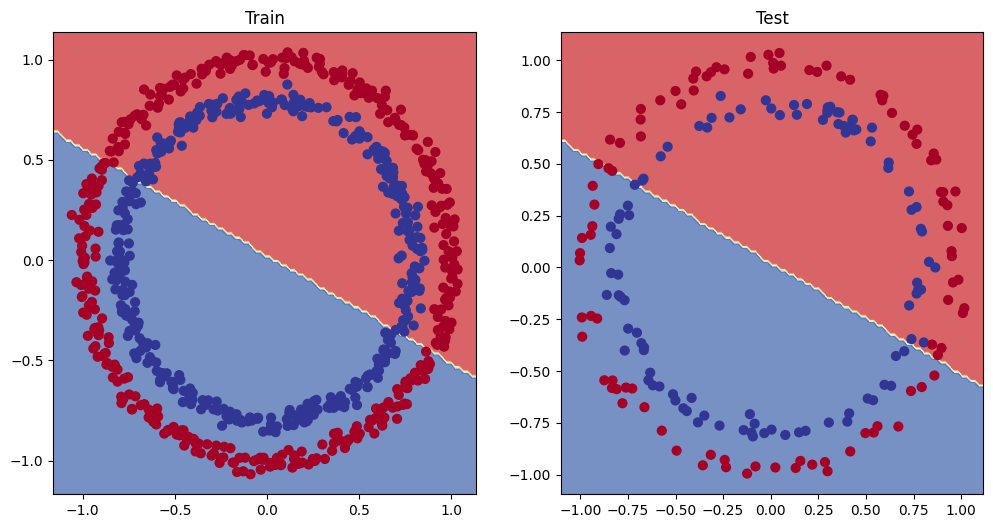

In [33]:
# plot decision boundry of the model
from helper_functions import plot_predictions, plot_decision_boundary

plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.title("Train")
plot_decision_boundary(model=model_0, X=X_train, y=y_train)
plt.subplot(1, 2, 2)
plt.title("Test")
plot_decision_boundary(model=model_0, X=X_test, y=y_test)

The model is linear regression that is why it draws a line to seperate the data,
the problem is we can't seperate circular data with a straight line

## 5. improving the model by changing the hyperparameters
* add more layers (we currently have 2)
* add more hidden units (we currently have 5)
* more epochs (aka fit the model for longer time)
* change the activation function
* change the loss function
* change the learning rate (exploding gradient problem vs vanishing gradient problem) which means too big vs too small learning rate




* parameeters: are the number within/inside the model (weights and biases)

* hyper parameters: the the values that we change to improve the model  

to improve the model we will try the following:
* add more hidden units: 5 > 10
* increase the number of layers: 2 > 3
* increase the number of epochs: 100 > 1000

it is recommended not to change all of this together in one time, but it is better to change only one value at a time and track its results to check its effect on the model (this is called expirment tracking)


In [34]:
X_train[:5] # notice that the input layer has 2 features

tensor([[ 0.6579, -0.4651],
        [ 0.6319, -0.7347],
        [-1.0086, -0.1240],
        [-0.9666, -0.2256],
        [-0.1666,  0.7994]])

In [35]:
y_train[:5]#notice that the output layer has 1 feature

tensor([1., 0., 0., 0., 1.])

In [36]:
class CircleModelV1(nn.Module):
  def __init__(self):
    super().__init__()
    self.layer_1 = nn.Linear(in_features=2, out_features=10)
    self.layer_2 = nn.Linear(in_features=10, out_features=10)
    self.layer_3 = nn.Linear(in_features=10, out_features=1)

  def forward(self, x: torch.Tensor) -> torch.Tensor:
    #z = self.layer_1(x)
    #z = self.layer_2(z)
    #z = self.layer_3(z)
    # these 3 lines do the same thing as the line below
    return self.layer_3(self.layer_2(self.layer_1(x)))

In [37]:
model_1 = CircleModelV1().to(device)
model_1

CircleModelV1(
  (layer_1): Linear(in_features=2, out_features=10, bias=True)
  (layer_2): Linear(in_features=10, out_features=10, bias=True)
  (layer_3): Linear(in_features=10, out_features=1, bias=True)
)

In [38]:
model_0.state_dict()

OrderedDict([('0.weight',
              tensor([[ 0.0646,  0.3462],
                      [ 0.5169,  0.0609],
                      [-0.4773, -0.0986],
                      [-0.5091, -0.1210],
                      [ 0.4437,  0.2611]])),
             ('0.bias', tensor([ 0.2102,  0.5561, -0.0243,  0.2989,  0.0414])),
             ('1.weight',
              tensor([[-0.2588,  0.3206,  0.1377,  0.2025, -0.1257]])),
             ('1.bias', tensor([-0.1729]))])

In [39]:
model_1.state_dict() # notice that we have more parameters here

OrderedDict([('layer_1.weight',
              tensor([[ 0.5406,  0.5869],
                      [-0.1657,  0.6496],
                      [-0.1549,  0.1427],
                      [-0.3443,  0.4153],
                      [ 0.6233, -0.5188],
                      [ 0.6146,  0.1323],
                      [ 0.5224,  0.0958],
                      [ 0.3410, -0.0998],
                      [ 0.5451,  0.1045],
                      [-0.3301,  0.1802]])),
             ('layer_1.bias',
              tensor([-0.3258, -0.0829, -0.2872,  0.4691, -0.5582, -0.3260, -0.1997, -0.4252,
                       0.0667, -0.6984])),
             ('layer_2.weight',
              tensor([[ 0.2856, -0.2686,  0.2441,  0.0526, -0.1027,  0.1954,  0.0493,  0.2555,
                        0.0346, -0.0997],
                      [ 0.0850, -0.0858,  0.1331,  0.2823,  0.1828, -0.1382,  0.1825,  0.0566,
                        0.1606, -0.1927],
                      [-0.3130, -0.1222, -0.2426,  0.2595,  0.0911,  0.1

In [40]:
loss_fn = nn.BCEWithLogitsLoss()
optimizer = torch.optim.SGD(params=model_1.parameters(), lr=0.1)

In [41]:
#Training and testing loop
torch.manual_seed(42)

epochs = 1000

#put data on the target device
X_train= X_train.to(device)
y_train = y_train.to(device)
X_test = X_test.to(device)
y_test = y_test.to(device)

for epoch in range(epochs):
  model_1.train()

  #forward pass
  y_logits = model_1(X_train).squeeze()
  y_pred = torch.round(torch.sigmoid(y_logits)) # turn logits > prediction probabilities > prediction labels

  # calculate loss
  loss = loss_fn(y_logits, y_train)
  acc = accuracy_fn(y_true=y_train, y_pred=y_pred)

  optimizer.zero_grad()

  #backpropogation
  loss.backward()

  #gradient decent
  optimizer.step()

  #Testing
  model_1.eval()
  with torch.inference_mode():
    #forward pass
    test_logits = model_1(X_test).squeeze()
    test_pred = torch.round(torch.sigmoid(test_logits))

    #calculate loss
    test_loss = loss_fn(test_logits, y_test)
    test_acc = accuracy_fn(y_true=y_test, y_pred=test_pred)

    if epoch % 100 == 0:
      print(f"Epoch: {epoch} | Loss: {loss:.5f}, Accuracy: {acc:.2f}% | Test Loss: {test_loss:.5f}, Test Acc: {test_acc:.2f}%")

Epoch: 0 | Loss: 0.69396, Accuracy: 50.88% | Test Loss: 0.69261, Test Acc: 51.00%
Epoch: 100 | Loss: 0.69305, Accuracy: 50.38% | Test Loss: 0.69379, Test Acc: 48.00%
Epoch: 200 | Loss: 0.69299, Accuracy: 51.12% | Test Loss: 0.69437, Test Acc: 46.00%
Epoch: 300 | Loss: 0.69298, Accuracy: 51.62% | Test Loss: 0.69458, Test Acc: 45.00%
Epoch: 400 | Loss: 0.69298, Accuracy: 51.12% | Test Loss: 0.69465, Test Acc: 46.00%
Epoch: 500 | Loss: 0.69298, Accuracy: 51.00% | Test Loss: 0.69467, Test Acc: 46.00%
Epoch: 600 | Loss: 0.69298, Accuracy: 51.00% | Test Loss: 0.69468, Test Acc: 46.00%
Epoch: 700 | Loss: 0.69298, Accuracy: 51.00% | Test Loss: 0.69468, Test Acc: 46.00%
Epoch: 800 | Loss: 0.69298, Accuracy: 51.00% | Test Loss: 0.69468, Test Acc: 46.00%
Epoch: 900 | Loss: 0.69298, Accuracy: 51.00% | Test Loss: 0.69468, Test Acc: 46.00%


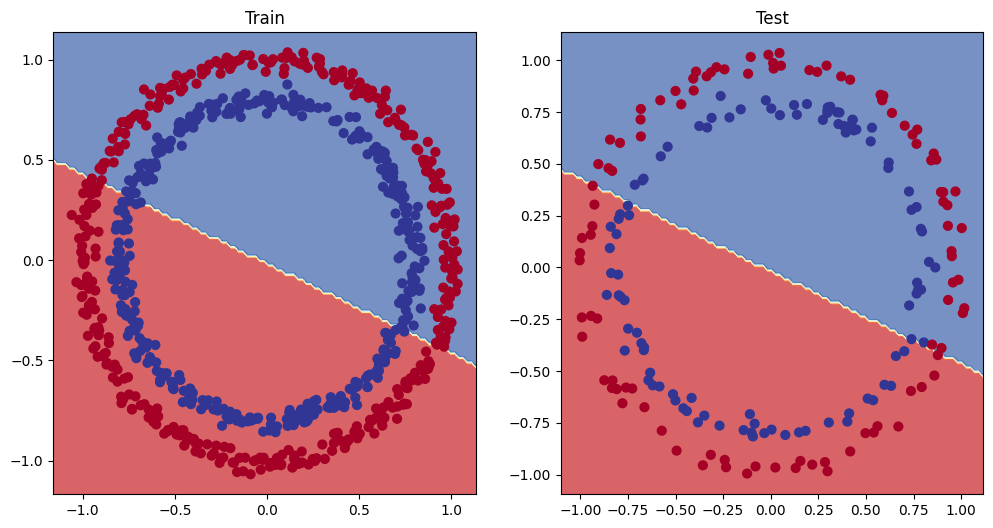

In [42]:
#plot the decision boundry
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.title("Train")
plot_decision_boundary(model=model_1, X=X_train, y=y_train)
plt.subplot(1, 2, 2)
plt.title("Test")
plot_decision_boundary(model=model_1, X=X_test, y=y_test)

# 5.1 prepare another linear data to see if our moddel can fit a stright line

one way to troubleshoot to a larger proble, is to test out a smaller problem


In [43]:
#create some data
weight = 0.7
bias = 0.3

start = 0
end = 1
step = 0.01

X_regression = torch.arange(start, end, step).unsqueeze(dim=1)
y_regression = weight * X_regression + bias

print(len(X_regression))
print(len(y_regression))

X_regression[:5], y_regression[:5]

100
100


(tensor([[0.0000],
         [0.0100],
         [0.0200],
         [0.0300],
         [0.0400]]),
 tensor([[0.3000],
         [0.3070],
         [0.3140],
         [0.3210],
         [0.3280]]))

In [44]:
#create train and test split
train_test_split = int(0.8 * len(X_regression))
X_train_regression = X_regression[:train_test_split]
y_train_regression = y_regression[:train_test_split]
X_test_regression, y_test_regression  = X_regression[train_test_split:], y_regression[train_test_split:]

len(X_train_regression), len(y_train_regression), len(X_test_regression), len(y_test_regression)

(80, 80, 20, 20)

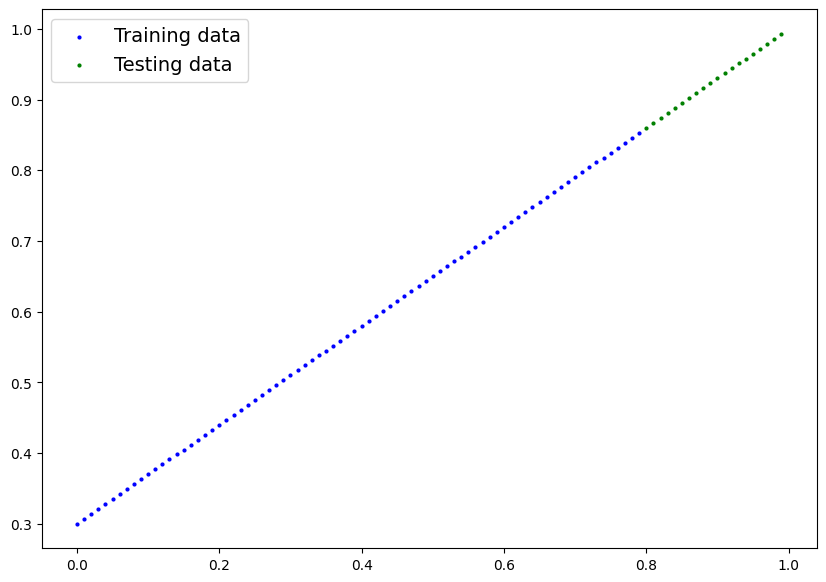

In [45]:
plot_predictions(train_data=X_train_regression,
                 train_labels=y_train_regression,
                 test_data=X_test_regression,
                 test_labels=y_test_regression
                  )

# 5.2 adjusting model_1 to fit a straight line

In [46]:
#same architecture as model_1 (but using n.Sequential())

model_2 = nn.Sequential(
    nn.Linear(in_features=1, out_features=10),
    nn.Linear(in_features=10, out_features=10),
    nn.Linear(in_features=10, out_features=1)
).to(device)

model_2

Sequential(
  (0): Linear(in_features=1, out_features=10, bias=True)
  (1): Linear(in_features=10, out_features=10, bias=True)
  (2): Linear(in_features=10, out_features=1, bias=True)
)

In [47]:
loss_fn = nn.L1Loss()
optimizer = torch.optim.SGD(params=model_2.parameters(), lr=0.1)

In [48]:
# training the model
torch.manual_seed(42)

epochs = 1000

#put data on the target device
#X_train_regression = X_train_regression.to(device)
#y_train_regression = y_train_regression.to(device)
#X_test_regression = X_test_regression.to(device)
#y_test_regression = y_test_regression.to(device)

#similar to
X_train_regression, y_train_regression = X_train_regression.to(device), y_train_regression.to(device)
X_test_regression, y_test_regression = X_test_regression.to(device), y_test_regression.to(device)

for epoch in range(epochs):
  model_2.train()

  #forward pass
  y_pred = model_2(X_train_regression)#.squeeze()

  #calculate loss
  loss = loss_fn(y_pred, y_train_regression)

  optimizer.zero_grad()

  #backpropogation
  loss.backward()

  #gradient decent
  optimizer.step()

  #Testing
  model_2.eval()
  with torch.inference_mode():
    #forward pass
    test_pred = model_2(X_test_regression)
    test_loss = loss_fn(test_pred, y_test_regression)

    if epoch % 100 == 0:
      print(f"Epoch: {epoch} | Loss: {loss:.5f} | Test Loss: {test_loss:.5f}")


Epoch: 0 | Loss: 0.75986 | Test Loss: 0.54143
Epoch: 100 | Loss: 0.09309 | Test Loss: 0.02901
Epoch: 200 | Loss: 0.07376 | Test Loss: 0.02850
Epoch: 300 | Loss: 0.06745 | Test Loss: 0.00615
Epoch: 400 | Loss: 0.06107 | Test Loss: 0.02004
Epoch: 500 | Loss: 0.05698 | Test Loss: 0.01061
Epoch: 600 | Loss: 0.04857 | Test Loss: 0.01326
Epoch: 700 | Loss: 0.06109 | Test Loss: 0.02127
Epoch: 800 | Loss: 0.05600 | Test Loss: 0.01425
Epoch: 900 | Loss: 0.05571 | Test Loss: 0.00603


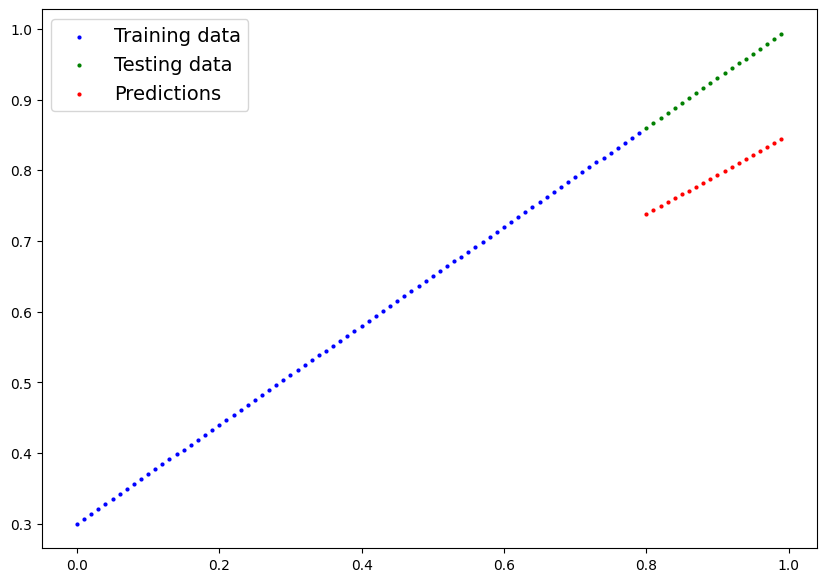

In [49]:
#make predictions
model_2.eval()
with torch.inference_mode():
  y_preds = model_2(X_test_regression)

plot_predictions(train_data=X_train_regression.cpu(),
                 train_labels=y_train_regression.cpu(),
                 test_data=X_test_regression.cpu(),
                 test_labels=y_test_regression.cpu(),
                 predictions=y_preds.cpu())

## 6. The missing piece: non-linearity

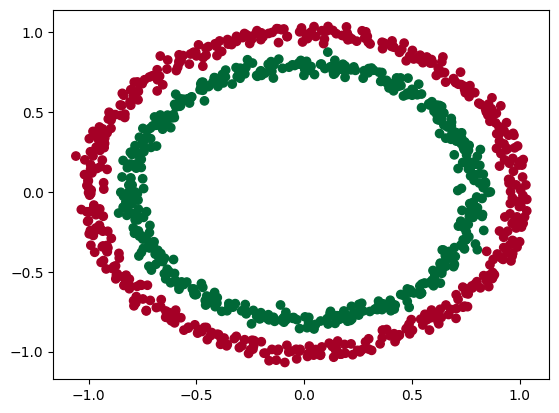

In [50]:
#recreate the non-linear data (red and blue circles)

import matplotlib.pyplot as plt
from sklearn.datasets import make_circles

n_samples = 1000

X, y = make_circles(n_samples,
                    noise=0.03,
                    random_state=42)
plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.RdYlGn)#RdYlBu

In [51]:
#convert data to tensors then to train and test split
import torch
from sklearn.model_selection import train_test_split

#convert data to tensors
X = torch.from_numpy(X).type(torch.float)
y = torch.from_numpy(y).type(torch.float)

#split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

len(X_train), len(y_train), len(X_test), len(y_test)

(800, 800, 200, 200)

In [52]:
X_train[:5], y_train[:5]

(tensor([[ 0.6579, -0.4651],
         [ 0.6319, -0.7347],
         [-1.0086, -0.1240],
         [-0.9666, -0.2256],
         [-0.1666,  0.7994]]),
 tensor([1., 0., 0., 0., 1.]))

# 6.2 building a model with non-linearity

* linear function = straight line
* non-linear functions = not a straight line

In [53]:
from torch import nn
class CircleModelV2(nn.Module):
  def __init__(self):
    super().__init__()
    self.layer_1 = nn.Linear(in_features=2, out_features=10)
    self.layer_2 = nn.Linear(in_features=10, out_features=10)
    self.layer_3 = nn.Linear(in_features=10, out_features=1)
    self.relu = nn.ReLU() # relu is a non-linear activation function
    # a function performs some sort of operations on a numerical input

  def forward(self, x: torch.Tensor) -> torch.Tensor:
    return self.layer_3(self.relu(self.layer_2(self.relu(self.layer_1(x)))))

In [54]:
model_3 = CircleModelV2().to(device)
model_3

CircleModelV2(
  (layer_1): Linear(in_features=2, out_features=10, bias=True)
  (layer_2): Linear(in_features=10, out_features=10, bias=True)
  (layer_3): Linear(in_features=10, out_features=1, bias=True)
  (relu): ReLU()
)

In [55]:
loss_fn = nn.BCEWithLogitsLoss() # this loss function is used for binary classification problems
#like:
#emails: spam or not spam
optimizer = torch.optim.SGD(params=model_3.parameters(), lr=0.1)

In [56]:
torch.manual_seed(42)
#torch.cuda.manual_seed(42) # we us this line with the previous line if we are using the GPU

#put data on target device
X_train, y_train = X_train.to(device), y_train.to(device)
X_test, y_test = X_test.to(device), y_test.to(device)

epochs = 1000

for epoch in range(epochs):
  model_3.train()

  #forward pass
  y_logits = model_3(X_train).squeeze()
  y_pred = torch.round(torch.sigmoid(y_logits)) #logits > prediction probabilites > prediction labels

  #calculate loss
  loss = loss_fn(y_logits, y_train) #the loss function nn.BCEWithLogits takes logits as the input
  acc = accuracy_fn(y_true=y_train, y_pred=y_pred)

  optimizer.zero_grad()

  #backpropogation
  loss.backward()

  #gradient decent
  optimizer.step()

  #Testing
  model_3.eval()
  with torch.inference_mode():
    #forward pass
    test_logits = model_3(X_test).squeeze()
    test_pred = torch.round(torch.sigmoid(test_logits))

    #calculate loss
    test_loss = loss_fn(test_logits, y_test)
    test_acc = accuracy_fn(y_true=y_test,
                           y_pred=test_pred)

    if epoch % 100 == 0:
      print(f"Epoch: {epoch} | Loss: {loss:.4f}, Accuracy: {acc:.2f}% | Test Loss: {test_loss:.4f}, Test Acc: {test_acc:.2f}%")



  #WHY MY MODEL IS NOT LEARNING ANY THING?




Epoch: 0 | Loss: 0.6929, Accuracy: 50.00% | Test Loss: 0.6932, Test Acc: 50.00%
Epoch: 100 | Loss: 0.6912, Accuracy: 52.88% | Test Loss: 0.6910, Test Acc: 52.50%
Epoch: 200 | Loss: 0.6898, Accuracy: 53.37% | Test Loss: 0.6894, Test Acc: 55.00%
Epoch: 300 | Loss: 0.6879, Accuracy: 53.00% | Test Loss: 0.6872, Test Acc: 56.00%
Epoch: 400 | Loss: 0.6852, Accuracy: 52.75% | Test Loss: 0.6841, Test Acc: 56.50%
Epoch: 500 | Loss: 0.6810, Accuracy: 52.75% | Test Loss: 0.6794, Test Acc: 56.50%
Epoch: 600 | Loss: 0.6751, Accuracy: 54.50% | Test Loss: 0.6729, Test Acc: 56.00%
Epoch: 700 | Loss: 0.6666, Accuracy: 58.38% | Test Loss: 0.6632, Test Acc: 59.00%
Epoch: 800 | Loss: 0.6516, Accuracy: 64.00% | Test Loss: 0.6476, Test Acc: 67.50%
Epoch: 900 | Loss: 0.6236, Accuracy: 74.00% | Test Loss: 0.6215, Test Acc: 79.00%


In [57]:
#notice that the reul layer doesn't have any parameters to optimize
model_3.state_dict()

OrderedDict([('layer_1.weight',
              tensor([[ 0.6760,  0.8035],
                      [-0.1997,  0.7568],
                      [-0.1549,  0.1427],
                      [-0.9637,  0.2292],
                      [ 0.5717, -1.3426],
                      [ 0.6689,  0.1840],
                      [ 0.7970,  0.2595],
                      [ 0.3410, -0.0998],
                      [ 0.6555,  0.3186],
                      [-0.3301,  0.1802]])),
             ('layer_1.bias',
              tensor([-0.3761, -0.2008, -0.2872,  0.2803, -0.4513, -0.3364, -0.3300, -0.4252,
                      -0.1989, -0.6984])),
             ('layer_2.weight',
              tensor([[ 1.3081e-01, -3.7347e-01,  2.4414e-01, -4.3348e-02, -2.7270e-01,
                        1.0512e-01, -4.7109e-02,  2.5550e-01, -4.9248e-02, -9.9730e-02],
                      [ 7.9469e-01,  3.8277e-01,  1.3309e-01,  7.5399e-01,  9.7241e-01,
                        2.6996e-01,  6.2185e-01,  5.6581e-02,  5.3486e-01, -1.927

### 6.4 evaluating a miodel trained with non-linear activation function

In [58]:
#make predictions
model_3.eval()
with torch.inference_mode():
  y_preds = torch.round(torch.sigmoid(model_3(X_test))).squeeze()
y_preds[:10], y_test[:10]

(tensor([1., 0., 1., 0., 0., 1., 0., 0., 1., 0.]),
 tensor([1., 0., 1., 0., 1., 1., 0., 0., 1., 0.]))

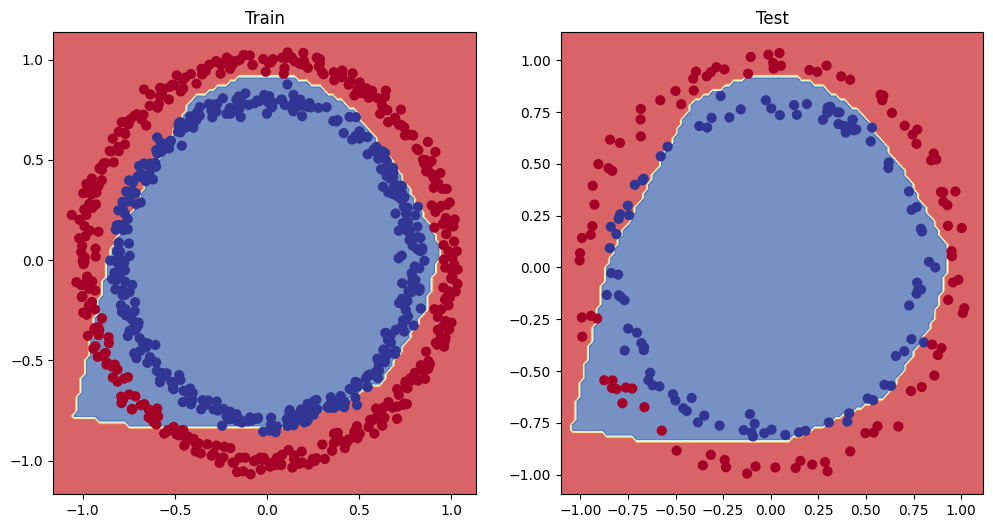

In [59]:
#plot decision boundries
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)# #rows, #columns, index
plt.title("Train")
plot_decision_boundary(model=model_3, X=X_train, y=y_train)
plt.subplot(1, 2, 2)
plt.title("Test")
plot_decision_boundary(model=model_3, X=X_test, y=y_test)

# compare linear vs non-linear

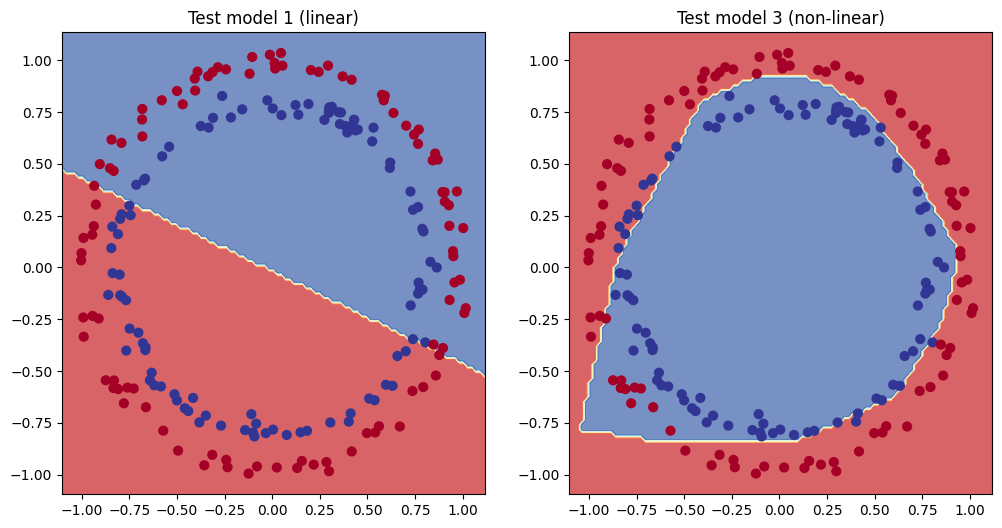

In [60]:
#plot decision boundries
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)# #rows, #columns, index
plt.title("Test model 1 (linear)")
plot_decision_boundary(model=model_1, X=X_test, y=y_test)
plt.subplot(1, 2, 2)
plt.title("Test model 3 (non-linear)")
plot_decision_boundary(model=model_3, X=X_test, y=y_test)

Challenge: can you improve model_3 to do better than 80% accuracy on the test data?
 by experminting with any of the following:
* add more layers
* add more hidden units  
* more epochs  
* change the activation function
* change the loss function
* change the learning rate (exploding gradient problem vs vanishing gradient problem) which means too big vs too small learning rate



# 7. Replicating a non-linear activation function

In [61]:
A = torch.arange(-10, 10, 1, dtype=torch.float32)
A.dtype

torch.float32

In [62]:
A

tensor([-10.,  -9.,  -8.,  -7.,  -6.,  -5.,  -4.,  -3.,  -2.,  -1.,   0.,   1.,
          2.,   3.,   4.,   5.,   6.,   7.,   8.,   9.])

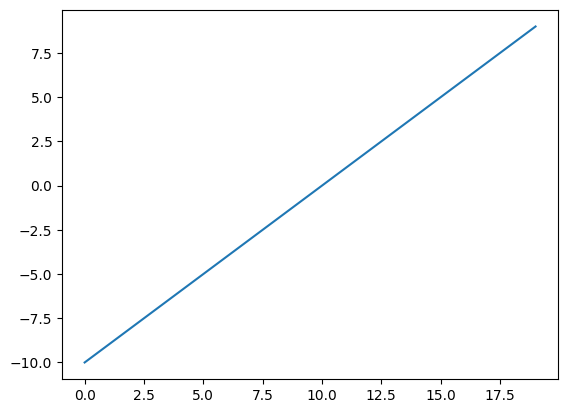

In [63]:
plt.plot(A)

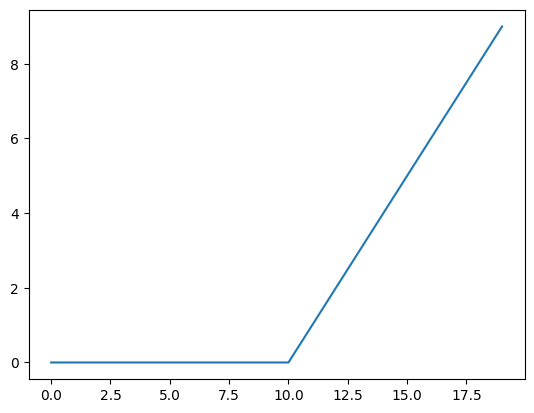

In [64]:
plt.plot(torch.relu(A)) #already defined relu function by pytorch

In [65]:
A

tensor([-10.,  -9.,  -8.,  -7.,  -6.,  -5.,  -4.,  -3.,  -2.,  -1.,   0.,   1.,
          2.,   3.,   4.,   5.,   6.,   7.,   8.,   9.])

In [66]:
def relu(x: torch.Tensor) -> torch.Tensor:
  return torch.maximum(torch.tensor(0), x)

relu(A) #we defined this function ourselves

tensor([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 2., 3., 4., 5., 6., 7.,
        8., 9.])

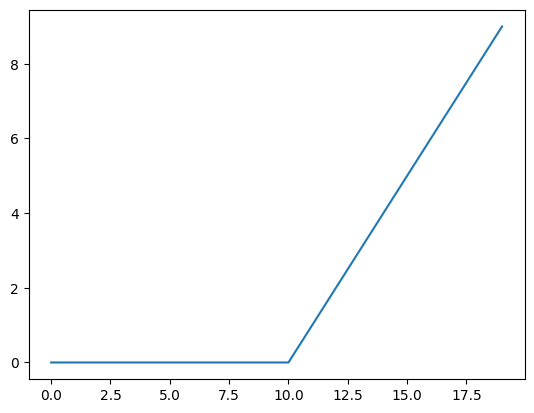

In [67]:
plt.plot(relu(A))

In [68]:
def sigmoid(x: torch.Tensor) -> torch.Tensor:
  return 1 / (1 + torch.exp(-x))

sigmoid(A)

tensor([4.5398e-05, 1.2339e-04, 3.3535e-04, 9.1105e-04, 2.4726e-03, 6.6929e-03,
        1.7986e-02, 4.7426e-02, 1.1920e-01, 2.6894e-01, 5.0000e-01, 7.3106e-01,
        8.8080e-01, 9.5257e-01, 9.8201e-01, 9.9331e-01, 9.9753e-01, 9.9909e-01,
        9.9966e-01, 9.9988e-01])

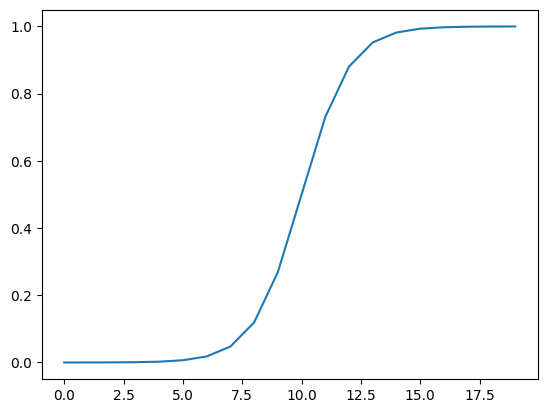

In [69]:
plt.plot(sigmoid(A))

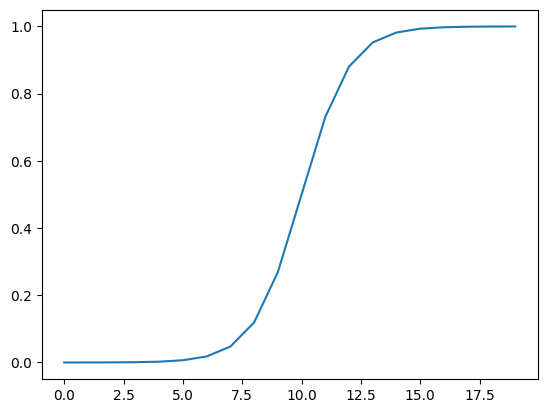

In [70]:
plt.plot(torch.sigmoid(A))

## 8. Putting all toghether for a multi-class classification problem

* Binary classification: two classes cat vs. dog
* Multi-class classification: more than two classes cat vs dog vs chicken

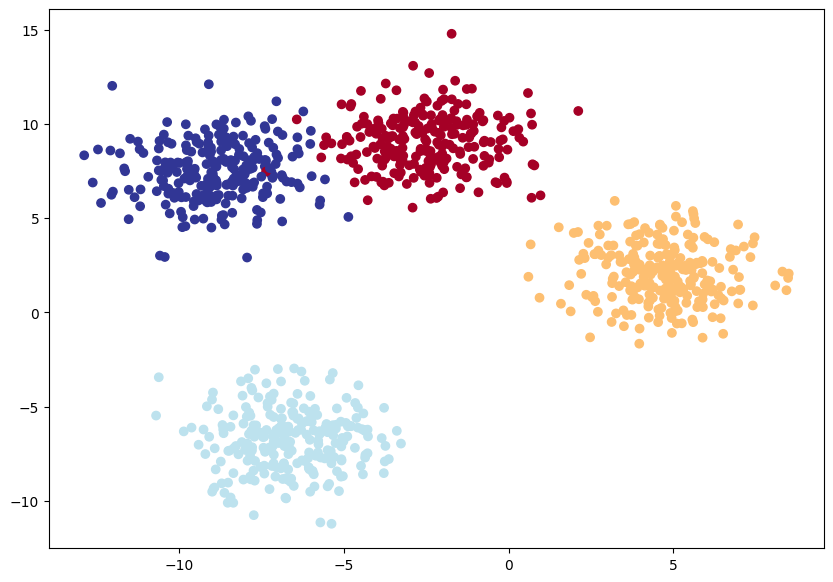

In [87]:
import torch
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
from sklearn.model_selection import train_test_split

#set the hyperparameters (they are in capital letters to tell users that they can change their values)
NUM_CLASSES = 4
NUM_FEATURES = 2
RANDOM_SEED = 42

X_blob, y_blob = make_blobs(n_samples=1000,
                            n_features=NUM_FEATURES,
                            centers=NUM_CLASSES,
                            cluster_std=1.5,
                            random_state=RANDOM_SEED)

#convert data to tensors because the data is in numpy format
X_blob = torch.from_numpy(X_blob).type(torch.float)
y_blob = torch.from_numpy(y_blob).type(torch.LongTensor)

X_blob_train, X_blob_test, y_blob_train, y_blob_test = train_test_split(X_blob, y_blob, test_size=0.2, random_state=RANDOM_SEED)

#plot data
plt.figure(figsize=(10, 7))
plt.scatter(X_blob[:, 0], X_blob[:, 1], c=y_blob, cmap=plt.cm.RdYlBu)


## 8.2 building a multi-class clasification model

In [88]:
#device agnostic code
device = "cuda" if torch.cuda.is_available() else "cpu"
device

'cpu'

In [89]:
class BlobModel(nn.Module):
  def __init__(self, input_features, output_features, hidden_units=8):
    """
    Initializes multi-class classification model

    Args:
      input_features (int): number of input features to the model
      output_features (int): number of output features (number of output classes)
      hidden_units (int): number of hidden units between the input and output layers, default is 8
    """
    super().__init__()
    self.linear_layer_stack = nn.Sequential(
        nn.Linear(in_features=input_features, out_features=hidden_units),
        #Relu means non-linear function
        nn.ReLU(), # if we want this model to be linear we will comment this line
        nn.Linear(in_features=hidden_units, out_features=hidden_units),
        nn.ReLU(), # if we want this model to be linear we will comment this line
        nn.Linear(in_features=hidden_units, out_features=output_features)
    )

  def forward(self, x: torch.Tensor):
    return self.linear_layer_stack(x)# we need "self."" becuase we initialized "self.linear_layer_stack " inside the constructor

In [90]:
model_4 = BlobModel(input_features=2, output_features=4).to(device)
model_4

BlobModel(
  (linear_layer_stack): Sequential(
    (0): Linear(in_features=2, out_features=8, bias=True)
    (1): ReLU()
    (2): Linear(in_features=8, out_features=8, bias=True)
    (3): ReLU()
    (4): Linear(in_features=8, out_features=4, bias=True)
  )
)

In [91]:
X_blob_train.shape, y_blob_train[:5] # x has 2 input features

(torch.Size([800, 2]), tensor([1, 0, 2, 2, 0]))

In [92]:
torch.unique(y_blob_train) # y has 4 classes so output features = 4

tensor([0, 1, 2, 3])

In [93]:
loss_fn = nn.CrossEntropyLoss() # loss function measures how wrong the predictions of our model are
optimizer = torch.optim.SGD(params=model_4.parameters(), lr=0.1)# optimizer updates the parameters of our model to reduce the loss

In [94]:
# make predictions
model_4.eval()
with torch.inference_mode():
  y_logits = model_4(X_blob_test.to(device)) # we need to comvert logits > prediction probabilities (use torch.softmax) > prediction labels (use argmax)
y_logits[:10]

tensor([[-0.7646, -0.7412, -1.5777, -1.1376],
        [-0.0973, -0.9431, -0.5963, -0.1371],
        [ 0.2528, -0.2379,  0.1882, -0.0066],
        [-0.4134, -0.5204, -0.9303, -0.6963],
        [-0.3118, -1.3736, -1.1991, -0.3834],
        [-0.1497, -1.0617, -0.7107, -0.1645],
        [ 0.1539, -0.2887,  0.1520, -0.0109],
        [-0.2154, -1.1795, -0.9300, -0.2745],
        [ 0.2443, -0.2472,  0.1649,  0.0061],
        [-0.2329, -1.2120, -0.9849, -0.3004]])

In [95]:
# the previous output of y_preds[:10] is not the same as this
y_blob_test[:10]

tensor([1, 3, 2, 1, 0, 3, 2, 0, 2, 0])

In [96]:
#convert the logits to prediction probabilities
y_pred_probs = torch.softmax(y_logits, dim=1)
print(y_logits[:5])
print(y_pred_probs[:5]) # each number represents the probability of each of the 4 classes

tensor([[-0.7646, -0.7412, -1.5777, -1.1376],
        [-0.0973, -0.9431, -0.5963, -0.1371],
        [ 0.2528, -0.2379,  0.1882, -0.0066],
        [-0.4134, -0.5204, -0.9303, -0.6963],
        [-0.3118, -1.3736, -1.1991, -0.3834]])
tensor([[0.3169, 0.3244, 0.1405, 0.2182],
        [0.3336, 0.1432, 0.2026, 0.3206],
        [0.3011, 0.1843, 0.2823, 0.2323],
        [0.3078, 0.2766, 0.1836, 0.2320],
        [0.3719, 0.1286, 0.1532, 0.3463]])


In [97]:
# convert our model's prediction probabilities to prediction labels
y_preds = torch.argmax(y_pred_probs, dim=1)
y_preds[:10]

tensor([1, 0, 0, 0, 0, 0, 0, 0, 0, 0])

In [99]:
# notice that the output of the previous cell is in the same format as in this cell
y_blob_test[:10]

tensor([1, 3, 2, 1, 0, 3, 2, 0, 2, 0])

## 8.5 create a training and testing loops for a multi-class classification problem

In [100]:
y_logits.dtype, y_blob_train.dtype

(torch.float32, torch.int64)

In [101]:
y_logits, y_blob_train

(tensor([[-7.6459e-01, -7.4120e-01, -1.5777e+00, -1.1376e+00],
         [-9.7256e-02, -9.4310e-01, -5.9631e-01, -1.3715e-01],
         [ 2.5277e-01, -2.3794e-01,  1.8817e-01, -6.5686e-03],
         [-4.1340e-01, -5.2042e-01, -9.3033e-01, -6.9626e-01],
         [-3.1184e-01, -1.3736e+00, -1.1991e+00, -3.8337e-01],
         [-1.4971e-01, -1.0617e+00, -7.1069e-01, -1.6452e-01],
         [ 1.5388e-01, -2.8874e-01,  1.5199e-01, -1.0874e-02],
         [-2.1543e-01, -1.1795e+00, -9.3000e-01, -2.7448e-01],
         [ 2.4432e-01, -2.4716e-01,  1.6492e-01,  6.1045e-03],
         [-2.3286e-01, -1.2120e+00, -9.8487e-01, -3.0037e-01],
         [-1.7742e-01, -1.1008e+00, -8.2929e-01, -2.3689e-01],
         [-9.4082e-01, -7.8985e-01, -1.8480e+00, -1.3347e+00],
         [-2.9723e-01, -1.3458e+00, -1.1543e+00, -3.6287e-01],
         [-2.9006e-01, -1.3393e+00, -1.1146e+00, -3.3518e-01],
         [-3.3713e-01, -1.4374e+00, -1.2379e+00, -3.8029e-01],
         [-1.0260e-01, -9.5066e-01, -6.1913e-01, -1.510

In [102]:
torch.manual_seed(42)
#torch.cuda.mnual.seed(42)

epochs = 100

X_blob_train, y_blob_train = X_blob_train.to(device), y_blob_train.to(device)
X_blob_test, y_blob_test = X_blob_test.to(device), y_blob_test.to(device)

for epoch in range(epochs):
  model_4.train()
  y_logits = model_4(X_blob_train).squeeze()
  y_pred = torch.softmax(y_logits, dim=1)
  y_pred = torch.argmax(y_pred, dim=1)

  loss = loss_fn(y_logits, y_blob_train)
  acc = accuracy_fn(y_true=y_blob_train, y_pred=y_pred)

  optimizer.zero_grad()
  loss.backward()
  optimizer.step()

  # Testing
  model_4.eval()
  with torch.inference_mode():
    test_logits = model_4(X_blob_test).squeeze()
    test_pred = torch.softmax(test_logits, dim=1)
    test_pred = torch.argmax(test_pred, dim=1)

    test_loss = loss_fn(test_logits, y_blob_test)
    test_acc = accuracy_fn(y_true=y_blob_test, y_pred=test_pred)

    if epoch % 10 == 0:
      print(f"Epoch: {epoch} | Loss: {loss:.4f}, Accuracy: {acc:.2f}% | Test Loss: {test_loss:.4f}, Test Acc: {test_acc:.2f}%")



Epoch: 0 | Loss: 1.1588, Accuracy: 40.38% | Test Loss: 1.0755, Test Acc: 48.00%
Epoch: 10 | Loss: 0.6448, Accuracy: 96.75% | Test Loss: 0.6607, Test Acc: 97.50%
Epoch: 20 | Loss: 0.4254, Accuracy: 98.50% | Test Loss: 0.4307, Test Acc: 100.00%
Epoch: 30 | Loss: 0.2529, Accuracy: 99.12% | Test Loss: 0.2451, Test Acc: 99.50%
Epoch: 40 | Loss: 0.1123, Accuracy: 99.25% | Test Loss: 0.1023, Test Acc: 99.50%
Epoch: 50 | Loss: 0.0663, Accuracy: 99.25% | Test Loss: 0.0585, Test Acc: 99.50%
Epoch: 60 | Loss: 0.0507, Accuracy: 99.25% | Test Loss: 0.0429, Test Acc: 99.50%
Epoch: 70 | Loss: 0.0430, Accuracy: 99.25% | Test Loss: 0.0349, Test Acc: 99.50%
Epoch: 80 | Loss: 0.0384, Accuracy: 99.25% | Test Loss: 0.0299, Test Acc: 99.50%
Epoch: 90 | Loss: 0.0352, Accuracy: 99.25% | Test Loss: 0.0266, Test Acc: 99.50%


## 8.6 Making and evaluating predictions with a Pytorch multi-class model

In [103]:
model_4.eval()
with torch.inference_mode():
  y_logits = model_4(X_blob_test).squeeze()

y_logits[:10]

tensor([[-0.6249,  5.9860, -7.6323, -8.4470],
        [-2.1738, -6.3750, -3.7202,  3.1203],
        [-3.4102, -3.8958,  3.1567, -2.6119],
        [-1.1505,  4.1962, -3.8472, -4.8820],
        [ 3.7548, -1.3391, -9.1422, -6.9466],
        [-2.8211, -7.5767, -4.2944,  3.7944],
        [-3.0306, -3.3328,  2.7955, -2.1374],
        [ 3.3761, -4.0375, -6.8987, -3.5503],
        [-4.3620, -4.9904,  3.8123, -3.3814],
        [ 3.5012, -3.0281, -7.5401, -4.7064]])

In [104]:
# go from logits -> prediction probabiliies
y_pred_probs = torch.softmax(y_logits, dim=1) #
y_pred_probs[:10]

tensor([[1.3437e-03, 9.9865e-01, 1.2164e-06, 5.3854e-07],
        [4.9905e-03, 7.4740e-05, 1.0630e-03, 9.9387e-01],
        [1.3985e-03, 8.6060e-04, 9.9463e-01, 3.1073e-03],
        [4.7389e-03, 9.9483e-01, 3.1956e-04, 1.1353e-04],
        [9.9388e-01, 6.0966e-03, 2.4904e-06, 2.2378e-05],
        [1.3372e-03, 1.1504e-05, 3.0644e-04, 9.9834e-01],
        [2.9138e-03, 2.1537e-03, 9.8781e-01, 7.1181e-03],
        [9.9838e-01, 6.0198e-04, 3.4435e-05, 9.7989e-04],
        [2.8147e-04, 1.5016e-04, 9.9882e-01, 7.5044e-04],
        [9.9825e-01, 1.4575e-03, 1.5997e-05, 2.7210e-04]])

In [106]:
# the output of the previous cell is not similar to the format of this cell yet
y_blob_test

tensor([1, 3, 2, 1, 0, 3, 2, 0, 2, 0, 0, 1, 0, 0, 0, 3, 3, 2, 3, 3, 3, 0, 1, 2,
        2, 2, 3, 0, 1, 0, 3, 1, 1, 3, 1, 2, 1, 3, 0, 2, 0, 3, 3, 2, 0, 3, 1, 1,
        0, 3, 1, 0, 1, 1, 3, 2, 1, 1, 3, 2, 2, 0, 3, 2, 2, 0, 0, 3, 3, 0, 0, 3,
        3, 3, 2, 3, 3, 3, 3, 1, 0, 2, 3, 2, 3, 3, 2, 3, 3, 2, 3, 3, 1, 3, 3, 3,
        1, 0, 3, 2, 0, 0, 3, 0, 2, 3, 1, 0, 3, 2, 1, 1, 0, 2, 2, 3, 0, 0, 1, 2,
        2, 3, 0, 1, 2, 0, 0, 0, 2, 3, 1, 2, 3, 2, 0, 3, 0, 0, 1, 1, 1, 0, 2, 2,
        2, 2, 0, 3, 3, 2, 2, 1, 3, 2, 0, 0, 3, 3, 2, 1, 2, 0, 3, 2, 0, 3, 2, 0,
        2, 2, 2, 0, 3, 1, 1, 1, 1, 1, 3, 1, 0, 2, 2, 1, 2, 2, 0, 1, 2, 2, 0, 0,
        1, 3, 2, 0, 3, 1, 2, 1])

In [108]:
# convert prediction probabiliies -> to prediction labels
y_preds = torch.argmax(y_pred_probs, dim=1)
y_preds

tensor([1, 3, 2, 1, 0, 3, 2, 0, 2, 0, 0, 1, 0, 0, 0, 3, 3, 2, 3, 3, 3, 0, 1, 2,
        2, 2, 3, 0, 1, 0, 3, 1, 1, 3, 1, 2, 1, 3, 0, 2, 0, 3, 3, 2, 0, 3, 1, 1,
        0, 3, 1, 0, 1, 1, 3, 2, 1, 1, 3, 2, 2, 0, 3, 2, 2, 0, 0, 3, 3, 0, 0, 3,
        3, 3, 2, 3, 3, 3, 3, 1, 0, 2, 3, 2, 3, 3, 2, 3, 3, 2, 3, 3, 1, 3, 3, 3,
        1, 0, 3, 2, 0, 0, 3, 0, 2, 3, 1, 0, 3, 2, 1, 1, 0, 2, 2, 3, 0, 0, 1, 2,
        2, 3, 0, 1, 2, 0, 0, 0, 2, 3, 1, 2, 3, 2, 0, 3, 0, 0, 1, 1, 1, 0, 2, 2,
        2, 2, 0, 3, 0, 2, 2, 1, 3, 2, 0, 0, 3, 3, 2, 1, 2, 0, 3, 2, 0, 3, 2, 0,
        2, 2, 2, 0, 3, 1, 1, 1, 1, 1, 3, 1, 0, 2, 2, 1, 2, 2, 0, 1, 2, 2, 0, 0,
        1, 3, 2, 0, 3, 1, 2, 1])

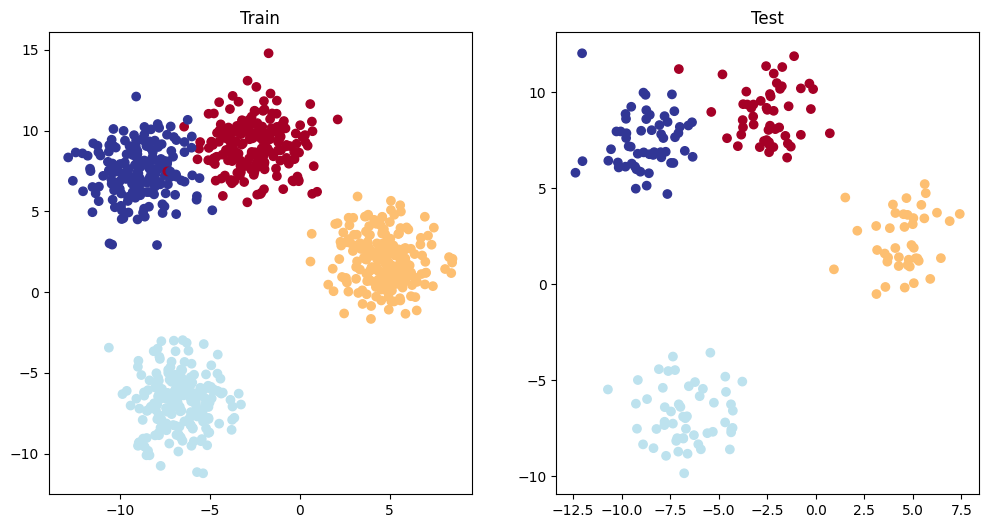

In [109]:
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.title("Train")
plt.scatter(X_blob_train[:, 0], X_blob_train[:, 1], c=y_blob_train, cmap=plt.cm.RdYlBu)
plt.subplot(1, 2, 2)
plt.title("Test")
plt.scatter(X_blob_test[:, 0], X_blob_test[:, 1], c=y_preds, cmap=plt.cm.RdYlBu)

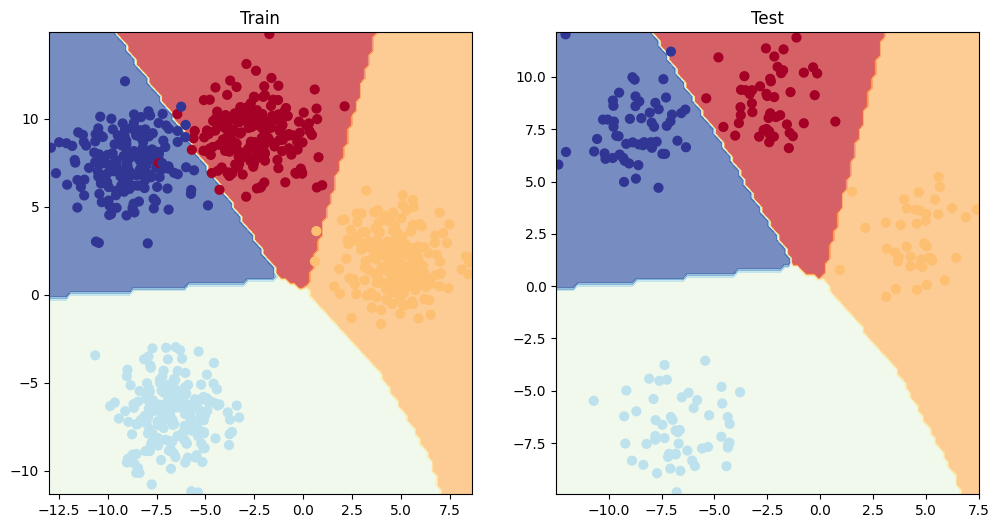

In [110]:
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.title("Train")
plot_decision_boundary(model_4, X_blob_train, y_blob_train)
plt.subplot(1, 2, 2)
plt.title("Test")
plot_decision_boundary(model_4, X_blob_test, y_blob_test)

## 9. A few more classification metrics .. (to evaluate our classification model)

* Accuracy  - out of 100 samples, how many does our model gets right?

* percision

* Recall

* F1-score

* confusion matrix

* classification report

*Check percision recall trade-off


*When to use percision and recall:
https://medium.com/data-science/beyond-accuracy-precision-and-recall-3da06bea9f6c



*Types of loss functions:
https://ml-cheatsheet.readthedocs.io/en/latest/loss_functions.html

In [115]:
!pip install torchmetrics
import torchmetrics

In [122]:
from torchmetrics.classification import Accuracy

torchmetric_accuracy = Accuracy(task="multiclass", num_classes=4).to(device)
torchmetric_accuracy(y_preds, y_blob_test)

#resource: https://lightning.ai/docs/torchmetrics/stable/classification/accuracy.html

tensor(0.9950)